# 1 3 5 - Jack
# 2 4 - Jayden
Explain why we chose a given algorithm not how the algorithm works

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from kneed import KneeLocator

patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# KNN Scores
knn = Pipeline(
    [
        ('Imputer', KNNImputer(n_neighbors=3, weights='distance')),
        ('Scaler', MinMaxScaler(feature_range=(0, 1))),
        ('KNN', KNeighborsClassifier(3, weights='distance',)),
    ]
)
def test_model_on_all_data(model, data:list=list(range(1,6))):
    predicitons = []
    for i in data:
        try:
            train, target, test = read_classification_dataset(i)
            X, y = train.values, target.values.flatten()
            score = cross_val_score(model, X, y,scoring='f1_weighted', cv=5)
            print(f"dataset {i} weighted F1 score 5 fold cv: ",score)
            score.sort()
            print(f"mean: {score.mean():.3f}", )
            print(f"median: {score[len(score)//2+1]:.3f}", )
            print(f"std: {score.std():.3f}", )

            predicitons.append(model.fit(train, np.ravel(target)).predict(test.values))

        except ValueError as e:
            print(e)
    return predicitons

def test_model_on_data(model, data_set_number:int):
    try:
        train, target, test = read_classification_dataset(data_set_number)
        X, y = train.values, target.values.flatten()
        score = cross_val_score(model, X, y,scoring='f1_weighted', cv=5)
        print(f"dataset {data_set_number} weighted F1 score 5 fold cv: ",score)
        predicitons = model.fit(train, np.ravel(target)).predict(test.values)
        return predicitons

    except ValueError as e:
        print(e)

test_model_on_all_data(knn)

    # else:
    #     display(train.dtypes)
    #     display(train.head())

c:\Users\Morri\Documents\Notebooks\ML\Project


c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


dataset 1 weighted F1 score 5 fold cv:  [1.         0.96866002 0.89555556 0.91262626 0.9503876 ]
mean: 0.945
median: 0.969
std: 0.038
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 2 weighted F1 score 5 fold cv:  [0.93       0.89666667 0.84666667 0.58666667 0.83333333]
mean: 0.819
median: 0.897
std: 0.121
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 3 weighted F1 score 5 fold cv:  [0.27879944 0.25214527 0.28124662 0.27397405 0.26759597]
mean: 0.271
median: 0.279
std: 0.010
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 4 weighted F1 score 5 fold cv:  [0.8001186  0.65752045 0.64975154 0.56101407 0.42992551]
mean: 0.620
median: 0.658
std: 0.122
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 5 weighted F1 score 5 fold cv:  [0.41752807 0.49388537 0.51068452 0.49077729 0.52656167]
mean: 0.488
median: 0.511
std: 0.037


[array([2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
        3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 5, 1, 1, 4, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([ 3, 11,  2,  4,  8,  8,  8,  8,  4,  8, 10, 11,  1,  1, 10,  8,  6,
         3,  8,  9,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 10, 11, 10, 11,
         4, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2,  8,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,
        11,  8, 10,  8,  8,  8], dtype=int64),
 array([7, 8, 1, ..., 2, 7, 4], dtype=int64),
 array([1, 1, 1, ..., 8, 8, 8], dtype=int64),
 array([5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 6, 5,
        6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
        5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5,
        6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 3, 6, 6, 6, 7, 5, 6, 6,
        6, 6, 5, 6, 5, 7, 5, 6, 6, 7, 6, 6, 5, 8, 5, 6, 5, 7, 6

In [4]:
knn2 = Pipeline(
    [
        ('Imputer', KNNImputer(n_neighbors=3, weights='distance')),
        ('Scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier(3, weights='distance',)),
    ]
)
test_model_on_all_data(knn)


c:\Users\Morri\Documents\Notebooks\ML\Project


c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


dataset 1 weighted F1 score 5 fold cv:  [1.         0.96866002 0.89555556 0.91262626 0.9503876 ]
mean: 0.945
median: 0.969
std: 0.038
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 2 weighted F1 score 5 fold cv:  [0.93       0.89666667 0.84666667 0.58666667 0.83333333]
mean: 0.819
median: 0.897
std: 0.121
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 3 weighted F1 score 5 fold cv:  [0.27879944 0.25214527 0.28124662 0.27397405 0.26759597]
mean: 0.271
median: 0.279
std: 0.010
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 4 weighted F1 score 5 fold cv:  [0.8001186  0.65752045 0.64975154 0.56101407 0.42992551]
mean: 0.620
median: 0.658
std: 0.122
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 5 weighted F1 score 5 fold cv:  [0.41752807 0.49388537 0.51068452 0.49077729 0.52656167]
mean: 0.488
median: 0.511
std: 0.037


[array([2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
        3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 5, 1, 1, 4, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([ 3, 11,  2,  4,  8,  8,  8,  8,  4,  8, 10, 11,  1,  1, 10,  8,  6,
         3,  8,  9,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 10, 11, 10, 11,
         4, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2,  8,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,
        11,  8, 10,  8,  8,  8], dtype=int64),
 array([7, 8, 1, ..., 2, 7, 4], dtype=int64),
 array([1, 1, 1, ..., 8, 8, 8], dtype=int64),
 array([5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 6, 5,
        6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
        5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5,
        6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 3, 6, 6, 6, 7, 5, 6, 6,
        6, 6, 5, 6, 5, 7, 5, 6, 6, 7, 6, 6, 5, 8, 5, 6, 5, 7, 6

In [5]:
# print("Missing value count:",  train.isna().sum().sum())
# print("Number of categories:",(len(target[0].unique())))

In [6]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
# train_test_split

# n=150
# # do PCA dim reduction to 5
# pca = PCA(n_components=n)
# pca_evr = pca.fit(scale(train))

# pca_evr = (pca.explained_variance_ratio_)



# pca_evr = np.concatenate((np.zeros(1), pca_evr))
# plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title("PCA - Cumulative Explained Variance Ratio")
# plt.grid()
# print(np.cumsum(pca_evr))

In [7]:
# random forest
clf = Pipeline([
    ('imputation', KNNImputer(n_neighbors=3, weights='distance')),
    ('Scaler', StandardScaler()),
    ('classification', RandomForestClassifier(
          # max_depth=4,
          max_features="log2",
          bootstrap=True,
          # max_samples=1000,
          n_jobs=-1,
          class_weight="balanced_subsample",
          # warm_start=True,
          random_state=51
          ))
])
test_model_on_all_data(clf)


c:\Users\Morri\Documents\Notebooks\ML\Project


c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


dataset 1 weighted F1 score 5 fold cv:  [0.82222222 0.91811594 0.83623188 0.85333333 0.85333333]
mean: 0.857
median: 0.853
std: 0.033
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 2 weighted F1 score 5 fold cv:  [0.93      0.855     0.9       0.5525    0.8752381]
mean: 0.823
median: 0.900
std: 0.137
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 3 weighted F1 score 5 fold cv:  [0.30234747 0.29280829 0.31084786 0.29517894 0.30249737]
mean: 0.301
median: 0.302
std: 0.006
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 4 weighted F1 score 5 fold cv:  [0.84179386 0.75655658 0.75024983 0.78725237 0.50494985]
mean: 0.728
median: 0.787
std: 0.116
c:\Users\Morri\Documents\Notebooks\ML\Project
dataset 5 weighted F1 score 5 fold cv:  [0.44947917 0.53488113 0.62352206 0.53760667 0.5256793 ]
mean: 0.534
median: 0.538
std: 0.055


[array([2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
        1, 3, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([ 5, 11,  3,  4,  2,  6, 11,  8,  4,  3, 10, 11,  1,  1,  2,  3, 10,
         3,  8,  4,  4,  4,  4,  4,  4,  5,  5,  4,  5,  4, 10, 11, 10,  2,
        10, 10, 11,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  2,  8,  8,  2,  8,  3,  8,
         8,  5,  8,  8,  8, 11], dtype=int64),
 array([9, 8, 1, ..., 2, 6, 4], dtype=int64),
 array([1, 1, 1, ..., 8, 8, 8], dtype=int64),
 array([5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5,
        6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5,
        5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
        5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6, 6, 7, 5, 6, 6,
        6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 5, 6, 6

c:\Users\Morri\Documents\Notebooks\ML\Project
24
c:\Users\Morri\Documents\Notebooks\ML\Project
18
c:\Users\Morri\Documents\Notebooks\ML\Project
5
c:\Users\Morri\Documents\Notebooks\ML\Project
17
c:\Users\Morri\Documents\Notebooks\ML\Project
4
[24, 18, 5, 17, 4]


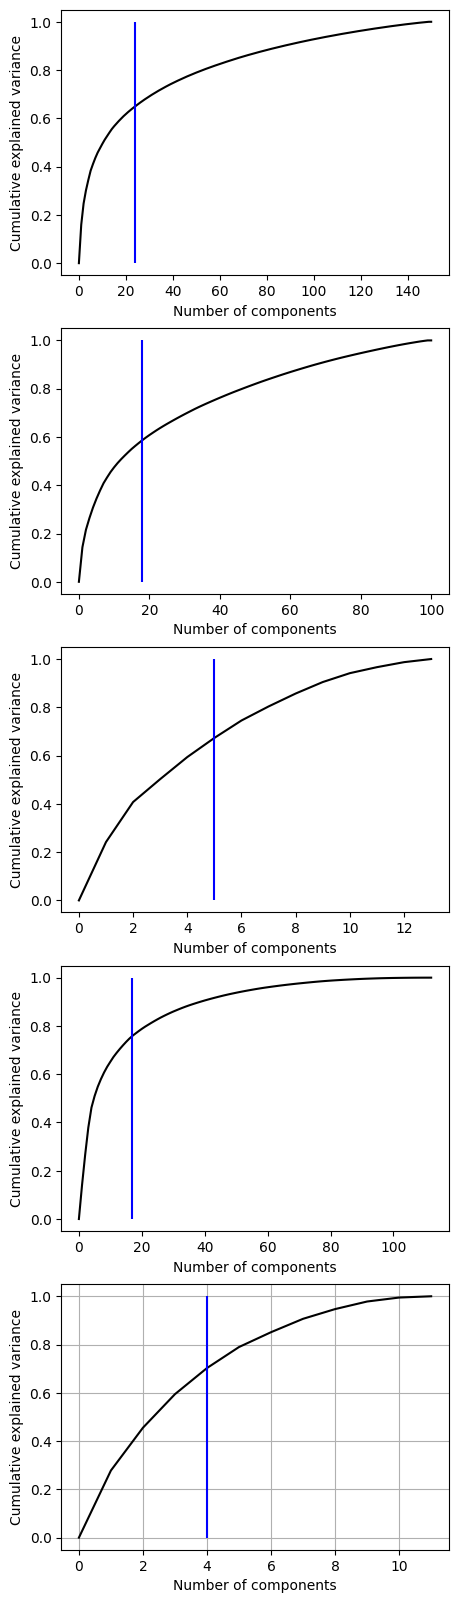

In [14]:
# find optimal components for each dataset
opt_components = []
fig, axes = plt.subplots(5,1, sharex=False)
fig.set_size_inches(5,20)
for i in range(1,6):
    train, target, test = read_classification_dataset(i)
    X, y = train.values, target.values.flatten()
    n = min(train.shape)
    model = Pipeline([
      ('Scaler', StandardScaler()),
      ('imputation', KNNImputer(n_neighbors=3, weights='distance')),
      ("PCA", PCA(n_components=n))
    ])
    pca = model.fit_transform(train)

    pca_evr = (model.named_steps["PCA"].explained_variance_ratio_)



    pca_evr = np.concatenate((np.zeros(1), pca_evr))
    indx, cum_evr  = np.arange(n+1), np.cumsum(pca_evr)
    kneedle = KneeLocator(indx, cum_evr, direction='increasing', curve='concave', S=1.0, interp_method='polynomial', online=True)
    print(kneedle.knee)
    opt_components.append(kneedle.knee)
    axes[i-1].plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
    axes[i-1].vlines(kneedle.knee, 0,1,'b', '-')
    axes[i-1].set_xlabel('Number of components')
    axes[i-1].set_ylabel('Cumulative explained variance')
    # axes[i-1].set_title("PCA - Cumulative Explained Variance Ratio")

    plt.grid()
print(opt_components)


In [9]:

# clf = LassoCV().fit(X, y)
# importance = np.abs(clf.coef_)
# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.01

# idx_features = (-importance).argsort()[:2]
# # name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(idx_features))

# sfm = SelectFromModel(clf, threshold=threshold)
# sfm.fit(X, y)
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]